In [1]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from skimage.feature import hog
from scipy.misc import imread
from sklearn.externals import joblib

import random as rand
import numpy as np 
import cv2
import glob
import time

import matplotlib.pyplot as plt
%matplotlib inline

from helpers import convert, show_images
from featuresourcer import FeatureSourcer

In [2]:
sourcer_params = {
  'color_model': 'yuv',                # hls, hsv, yuv, ycrcb
  'bounding_box_size': 64,             #
  'number_of_orientations': 6,        # 6 - 12
  'pixels_per_cell': 16,               # 8, 16
  'cells_per_block': 2,                # 1, 2
  'do_transform_sqrt': True
}

start_frame = imread("C:\\Users\\Deepak Reddy\\Desktop\\old desk\\Old_desk_04Feb18\\Python\\Trafficsign_Datasets\\
GTSDB\\FullIJCNN2013\\25\\00030.ppm") #OwnCollection\\vehicles\\MiddleClose\\image0066.png")
sourcer = FeatureSourcer(sourcer_params, start_frame)

c:\users\deepak reddy\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [3]:
print("Loading images to memory...")
t_start = time.time()

TS_imgs, NTS_imgs = [], []
TS_paths = glob.glob('C:\\Users\\Deepak Reddy\\Desktop\\old desk\\Old_desk_04Feb18\\Python\\Trafficsign_Datasets\\
GTSDB\\FullIJCNN2013\\Cropped_TS\\*.jpg') 
NTS_paths = glob.glob('C:\\Users\\Deepak Reddy\\Desktop\\old desk\\Old_desk_04Feb18\\Python\\Trafficsign_Datasets\\
GTSDB\\FullIJCNN2013\\Cropped_NTS\\*.jpg')

for path in TS_paths: TS_imgs.append(cv2.resize(imread(path), (64, 64)))# #imread(path)
for path in NTS_paths: NTS_imgs.append(cv2.resize(imread(path), (64, 64)))

TS_imgs, NTS_imgs = np.asarray(TS_imgs), np.asarray(NTS_imgs)
total_TS, total_NTS = TS_imgs.shape[0], NTS_imgs.shape[0]

print("... Done")
print("Time Taken:", np.round(time.time() - t_start, 2))
print("Traffic Sign images shape: ", TS_imgs.shape)
print("Non-Traffic Sign images shape: ", NTS_imgs.shape)

print("Extracting features... This might take a while...")
t_start = time.time()

TS_features, NTS_features = [], []

print("Traffic_signs...")
for img in TS_imgs:
  TS_features.append(sourcer.features(img))
  print('█', end = '')

print()
print("Non-Traffic_signs...")
for img in NTS_imgs:
  NTS_features.append(sourcer.features(img))
  print('█', end = '')
                         
TS_features = np.asarray(TS_features)
NTS_features = np.asarray(NTS_features)

print()
print("...Done")
print("Time Taken:", np.round(time.time() - t_start, 2))
print("Traffic_signs features shape: ", TS_features.shape)
print("Non-traffic_signs features shape: ", NTS_features.shape)


Loading images to memory...
... Done
Time Taken: 85.39
Traffic Sign images shape:  (852, 64, 64, 3)
Non-Traffic Sign images shape:  (9545, 64, 64, 3)
Extracting features... This might take a while...
Traffic_signs...
█████████

c:\users\deepak reddy\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████
Non-Traffic_signs...


████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

In [4]:
print("Scaling features...")
t_start = time.time()

unscaled_x = np.vstack((TS_features, NTS_features)).astype(np.float64)
scaler = StandardScaler().fit(unscaled_x)
x = scaler.transform(unscaled_x)
y = np.hstack((np.ones(total_TS), np.zeros(total_NTS)))

print("...Done")
print("Time Taken:", np.round(time.time() - t_start, 2))
print(" x shape: ", x.shape, " y shape: ", y.shape)

print("Training classifier...")
t_start = time.time()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                     random_state = rand.randint(1, 100))
svc = LinearSVC()
svc.fit(x_train, y_train)
accuracy = svc.score(x_test, y_test)

print("...Done")
print("Time Taken:", np.round(time.time() - t_start, 2))
print("Accuracy: ", np.round(accuracy, 4))

Scaling features...
...Done
Time Taken: 0.35
 x shape:  (10397, 312)  y shape:  (10397,)
Training classifier...
...Done
Time Taken: 1.08
Accuracy:  0.9947


In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc_rbf = SVC()
svc_rbf.fit(x_train, y_train)
accuracy = svc_rbf.score(x_test, y_test)
print("Accuracy: ", np.round(accuracy, 4))

Accuracy:  0.9995


In [6]:
y_test_NTS = np.where(y_test == 0)[0]
x_test_NTS = x_test[y_test_NTS]
y_test_TS0 = y_test[y_test_NTS]
y_test_TS = np.where(y_test == 1)[0]
x_test_TS = x_test[y_test_TS] 
y_test_TS1 = y_test[y_test_TS]
print ("No. of Traffic sign: %d " %len(y_test_TS1))
print ("No. of Non-Traffic sign: %d " %len(y_test_TS0))

No. of Traffic sign: 154 
No. of Non-Traffic sign: 1926 


In [7]:
accuracy = svc.score(x_test_NTS, y_test_TS0)
print("Accuracy of NTS: ", np.round(accuracy, 4))

accuracy = svc.score(x_test_TS, y_test_TS1)
print("Accuracy of TS: ", np.round(accuracy, 4))

Accuracy of NTS:  0.9969
Accuracy of TS:  0.9675


In [8]:

accuracy = svc_rbf.score(x_test_NTS, y_test_TS0)
print("Accuracy of NTS: ", np.round(accuracy, 4))

accuracy = svc_rbf.score(x_test_TS, y_test_TS1)
print("Accuracy of TS: ", np.round(accuracy, 4))

Accuracy of NTS:  1.0
Accuracy of TS:  0.9935


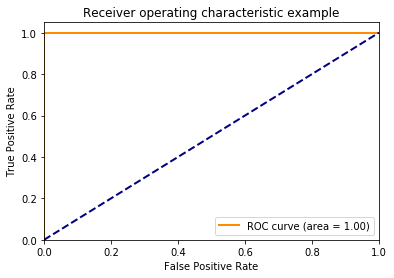

In [9]:
# Plotting roc curve
y_score = svc_rbf.fit(x_train, y_train).decision_function(x_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [8]:
C_range = np.outer(np.logspace(-1, 3, 6),np.array([1,5]))
# flatten matrix, change to 1D numpy array
C_range = C_range.flatten()
print("C range: ", C_range)

C range:  [  1.00000000e-01   5.00000000e-01   6.30957344e-01   3.15478672e+00
   3.98107171e+00   1.99053585e+01   2.51188643e+01   1.25594322e+02
   1.58489319e+02   7.92446596e+02   1.00000000e+03   5.00000000e+03]


In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(hidden_layer_sizes=(512), max_iter=100, alpha=1e-3,
                    solver='sgd', verbose=0, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

#params = {'solver': ['sgd','adam'], 'alpha' :[1e-4, 1e-3, 1e-2]} 
#clf = GridSearchCV(mlp, params, cv =2)
#clf.fit(images_train, labels_train)

mlp.fit(x_train, y_train)
print("Training set score: %f" % mlp.score(x_train, y_train))
print("Test set score: %f" % mlp.score(x_test, y_test))

Training set score: 1.000000
Test set score: 0.997512


In [10]:

accuracy = mlp.score(x_test_NTS, y_test_TS0)
print("Accuracy of NTS: ", np.round(accuracy, 4))

accuracy = mlp.score(x_test_TS, y_test_TS1)
print("Accuracy of TS: ", np.round(accuracy, 4))

Accuracy of NTS:  1.0
Accuracy of TS:  0.9918


In [9]:
sourcer = FeatureSourcer(sourcer_params, start_frame)

f1 = sourcer.features(NTS_imgs[rand.randint(0, total_NTS)])
f2 = sourcer.features(TS_imgs[rand.randint(0, total_TS)])
f4 = sourcer.features(TS_imgs[rand.randint(0, total_TS)])
f3 = sourcer.features(NTS_imgs[rand.randint(0, total_NTS)])

f = scaler.transform([f1, f2, f3, f4])
print(svc.predict(f))

[ 0.  1.  0.  1.]


c:\users\deepak reddy\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [10]:
print ("Saving models...")

joblib.dump(svc, 'svc2_ts7.pkl')
joblib.dump(svc_rbf, 'svc_rbf_ts7.pkl')
joblib.dump(scaler, 'scaler2_ts7.pkl')

print("...Done")

Saving models...
...Done


In [15]:
print ("Loading models...")

svc = joblib.load('svc_rbf_ts7.pkl')
scaler = joblib.load('scaler2_ts7.pkl')

print("...Done")

Loading models...
...Done


In [16]:
print(svc)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [17]:
sourcer = FeatureSourcer(sourcer_params, start_frame)

f1 = sourcer.features(NTS_imgs[rand.randint(0, total_NTS)])
f2 = sourcer.features(TS_imgs[rand.randint(0, total_TS)])
f4 = sourcer.features(TS_imgs[rand.randint(0, total_TS)])
f3 = sourcer.features(NTS_imgs[rand.randint(0, total_NTS)])

f = scaler.transform([f1, f2, f3, f4])
print(svc.predict(f))

[ 0.  1.  0.  1.]


c:\users\deepak reddy\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [14]:
f.shape

(4, 312)